# 생체 광학 데이터 분석 AI 경진대회

https://dacon.io/competitions/official/235608/overview/description

In [1]:
# lightgbm installiation
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 머신러닝 - LightGBM: 트리 기반 학습 알고리즘
import lightgbm as lgb
from lightgbm import LGBMRegressor

# 검증평가(사이킷런은 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리 입니다. 여러가지 머신러닝 모듈로 구성되어있습니다.)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

# 기타 
from tqdm import tqdm # 프로그램 진행상황을 그림으로 볼 수 있게 해주는 파이썬 라이브러리
import warnings ; warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv(r"/Users/user/Downloads/실전데이터알아보기 by 케이데이터랩 유요한/test.csv")
test

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,...,7.889599e-13,NaN,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
9996,19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,...,1.240848e-17,6.258180e-18,8.693704e-20,NaN,4.514449e-18,NaN,9.128300e-19,NaN,3.928314e-18,2.586781e-17
9997,19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,...,0.000000e+00,NaN,0.000000e+00,2.610282e-14,7.789652e-15,NaN,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13
9998,19998,20,0.08390,0.05690,0.08343,0.12324,0.12720,0.16732,0.18149,0.23766,...,0.000000e+00,7.084232e-18,NaN,0.000000e+00,2.669004e-18,8.586549e-18,0.000000e+00,4.489194e-18,2.892986e-17,NaN


In [4]:
train = pd.read_csv(r"/Users/user/Downloads/실전데이터알아보기 by 케이데이터랩 유요한/train.csv")
train

# rho : 거리, src: 빛의 입사, dst : 빛의 투과, hhb, hbo2, ca, na : 매질 종류 

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [5]:
train['rho'].unique()

array([25, 10, 15, 20])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   rho      10000 non-null  int64  
 2   650_src  10000 non-null  float64
 3   660_src  10000 non-null  float64
 4   670_src  10000 non-null  float64
 5   680_src  10000 non-null  float64
 6   690_src  10000 non-null  float64
 7   700_src  10000 non-null  float64
 8   710_src  10000 non-null  float64
 9   720_src  10000 non-null  float64
 10  730_src  10000 non-null  float64
 11  740_src  10000 non-null  float64
 12  750_src  10000 non-null  float64
 13  760_src  10000 non-null  float64
 14  770_src  10000 non-null  float64
 15  780_src  10000 non-null  float64
 16  790_src  10000 non-null  float64
 17  800_src  10000 non-null  float64
 18  810_src  10000 non-null  float64
 19  820_src  10000 non-null  float64
 20  830_src  10000 non-null  float64
 21  840_src  1000

<AxesSubplot:>

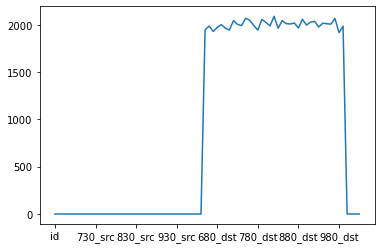

In [7]:
# missing data를 파악하고 어떻게 채울 것인지 고민하기 - 방법은 굉장히 다양함
# 1) 평균값으로 채워넣는다 2) 보간(interpolation)으로 집어넣는다 3) nearest 값
# 이 파일에서는 보간으로 채워넣는 법을 시연함
train.isnull().sum().plot() 

In [8]:
train.columns

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [9]:
column = ['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
           '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
           '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
           '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
           '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
           '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']

In [10]:
train_h = train.filter(regex = '_dst$', axis=1)
train_h

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,NaN,0.000000e+00,NaN,0.000000e+00,...,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17
1,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN
2,1.677445e-19,3.763590e-20,NaN,0.000000e+00,NaN,NaN,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,...,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN
3,4.044975e-11,NaN,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,NaN,1.583839e-10,NaN,...,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN
4,4.784751e-14,NaN,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.666663e-14,...,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.728013e-15,1.438586e-14,0.000000e+00,0.000000e+00,NaN,3.883500e-14,1.111576e-14,4.196881e-14,0.000000e+00,1.406853e-14,...,0.000000e+00,2.314357e-15,2.694142e-15,NaN,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14
9996,NaN,3.021131e-17,0.000000e+00,NaN,0.000000e+00,8.445801e-18,NaN,3.789188e-17,0.000000e+00,0.000000e+00,...,2.011769e-16,NaN,1.644859e-17,6.861706e-17,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15
9997,7.248393e-12,0.000000e+00,2.125747e-11,1.364016e-11,1.018564e-11,0.000000e+00,0.000000e+00,5.944397e-12,1.017627e-11,4.223636e-12,...,6.898068e-11,NaN,NaN,6.473638e-11,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10
9998,1.629438e-13,NaN,1.531261e-14,8.313464e-14,3.306053e-13,0.000000e+00,0.000000e+00,1.108741e-13,0.000000e+00,NaN,...,NaN,3.149953e-13,4.371711e-14,NaN,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11


In [11]:
train_dst = train.filter(regex = '_dst$', axis='columns') # regex: regular expression - 정규식
train_dst

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,NaN,0.000000e+00,NaN,0.000000e+00,...,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17
1,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN
2,1.677445e-19,3.763590e-20,NaN,0.000000e+00,NaN,NaN,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,...,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN
3,4.044975e-11,NaN,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,NaN,1.583839e-10,NaN,...,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN
4,4.784751e-14,NaN,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.666663e-14,...,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.728013e-15,1.438586e-14,0.000000e+00,0.000000e+00,NaN,3.883500e-14,1.111576e-14,4.196881e-14,0.000000e+00,1.406853e-14,...,0.000000e+00,2.314357e-15,2.694142e-15,NaN,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14
9996,NaN,3.021131e-17,0.000000e+00,NaN,0.000000e+00,8.445801e-18,NaN,3.789188e-17,0.000000e+00,0.000000e+00,...,2.011769e-16,NaN,1.644859e-17,6.861706e-17,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15
9997,7.248393e-12,0.000000e+00,2.125747e-11,1.364016e-11,1.018564e-11,0.000000e+00,0.000000e+00,5.944397e-12,1.017627e-11,4.223636e-12,...,6.898068e-11,NaN,NaN,6.473638e-11,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10
9998,1.629438e-13,NaN,1.531261e-14,8.313464e-14,3.306053e-13,0.000000e+00,0.000000e+00,1.108741e-13,0.000000e+00,NaN,...,NaN,3.149953e-13,4.371711e-14,NaN,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11


In [12]:
train.filter(regex = '_dst$', axis='columns').head().T # 시각화로 정보를 얻기 위해 전치행렬을 많이 쓴다 

,0,1,2,3,4
650_dst,2.447758e-18,0.000000e+00,1.677445e-19,4.044975e-11,4.784751e-14
660_dst,1.894578e-18,0.000000e+00,3.763590e-20,NaN,NaN
670_dst,0.000000e+00,0.000000e+00,NaN,5.345363e-11,0.000000e+00
680_dst,6.412913e-18,1.995530e-10,0.000000e+00,9.106886e-12,1.153089e-13
690_dst,1.098559e-17,1.025259e-10,NaN,1.881458e-11,0.000000e+00
700_dst,8.907142e-19,0.000000e+00,NaN,3.617201e-11,0.000000e+00
710_dst,NaN,0.000000e+00,8.981651e-19,7.909656e-13,1.056991e-13
720_dst,0.000000e+00,0.000000e+00,1.944683e-19,NaN,0.000000e+00
730_dst,NaN,NaN,8.126907e-19,1.583839e-10,0.000000e+00
740_dst,0.000000e+00,0.000000e+00,2.183200e-19,NaN,2.666663e-14


<AxesSubplot:>

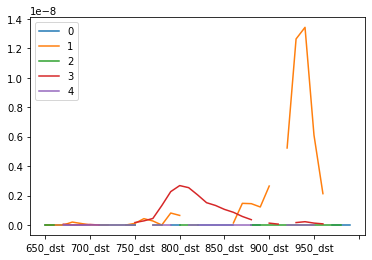

In [13]:
train.filter(regex = '_dst$', axis='columns').head().T.plot()

<AxesSubplot:>

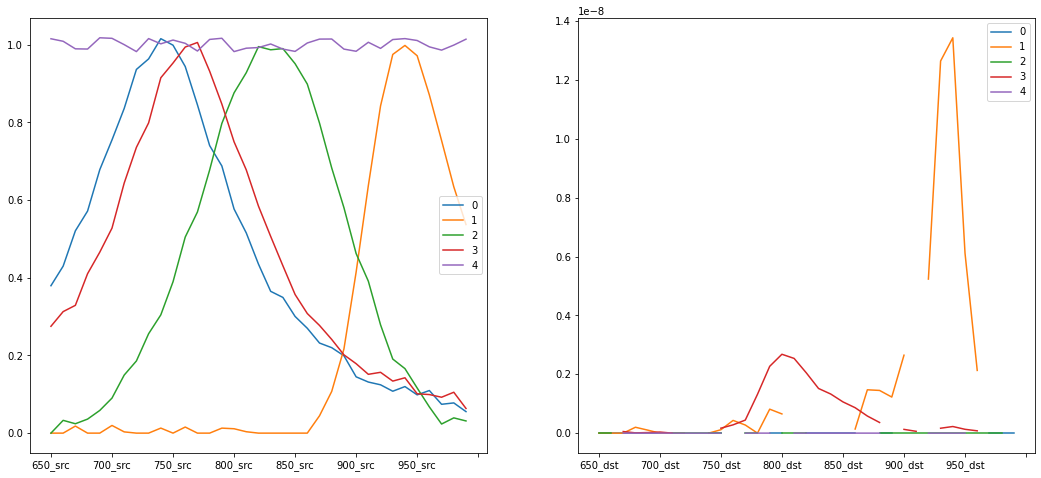

In [14]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# plt.figure(figsize=x) : 그래프가 1개일 때 사용
figure.set_size_inches(18,8) # 그래프가 여러개 일때 사용
train.filter(regex='_src$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax2)

<AxesSubplot:>

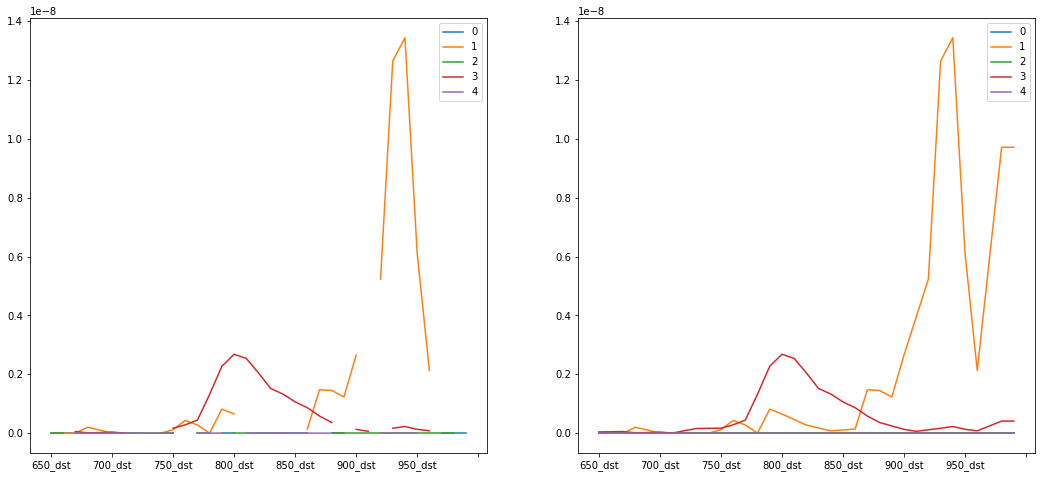

In [15]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.interpolate(method='linear', axis=0).plot(ax=ax2)

In [16]:
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [17]:
train_dst = train.filter(regex='_dst$', axis=1)
train_src = train.filter(regex='_src$', axis=1)
train_dst.columns = list(650 + np.arange(35)*10)
train_dst.columns

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')

<AxesSubplot:>

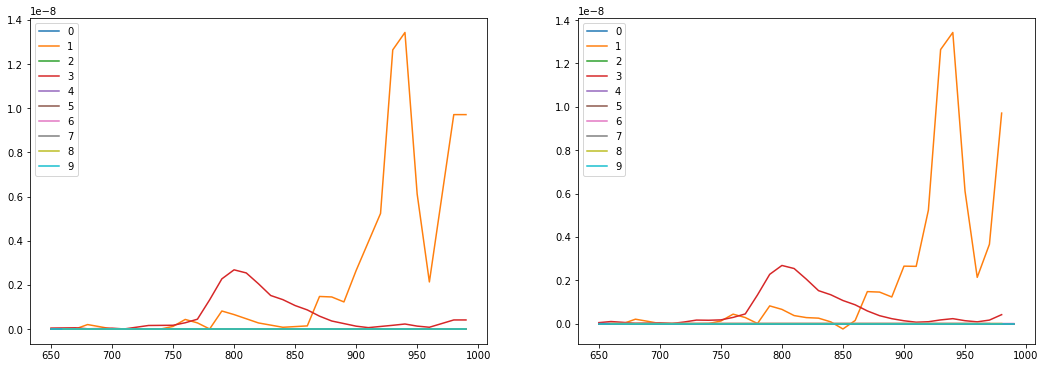

In [18]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)

train_dst.interpolate(method='linear', axis=1).head(10).T.plot(ax=ax1)
train_dst.interpolate(method='polynomial', order=3, axis=1).head(10).T.plot(ax=ax2)

<AxesSubplot:>

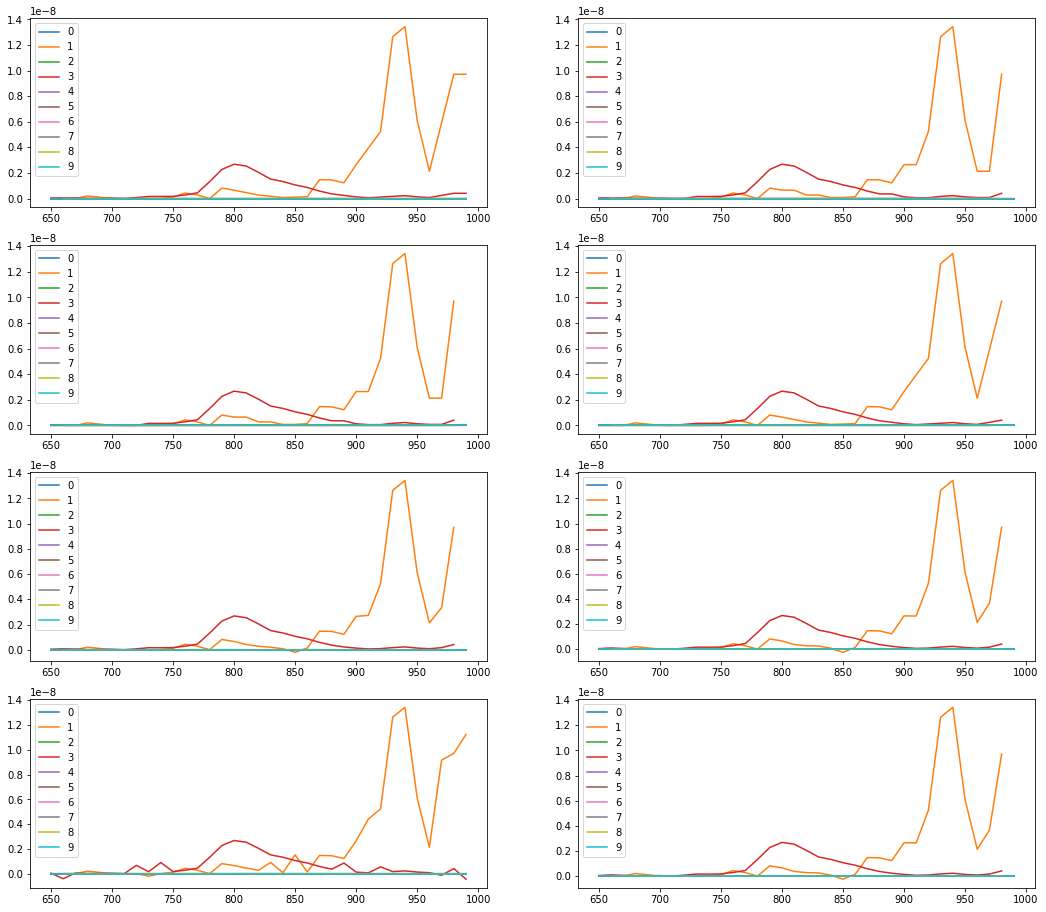

In [19]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10 

train_dst.interpolate(method='linear', axis=1).head(i).T.plot(ax=ax1)

train_dst.interpolate(method='nearest', axis=1).head(i).T.plot(ax=ax2)

train_dst.interpolate(method='zero', axis=1).head(i).T.plot(ax=ax3)

train_dst.interpolate(method='slinear', axis=1).head(i).T.plot(ax=ax4)

train_dst.interpolate(method='quadratic', axis=1).head(i).T.plot(ax=ax5)

train_dst.interpolate(method='cubic', axis=1).head(i).T.plot(ax=ax6)

train_dst.interpolate(method='spline', order=3, axis=1).head(i).T.plot(ax=ax7)

train_dst.interpolate(method='polynomial', order=3, axis=1).head(i).T.plot(ax=ax8)

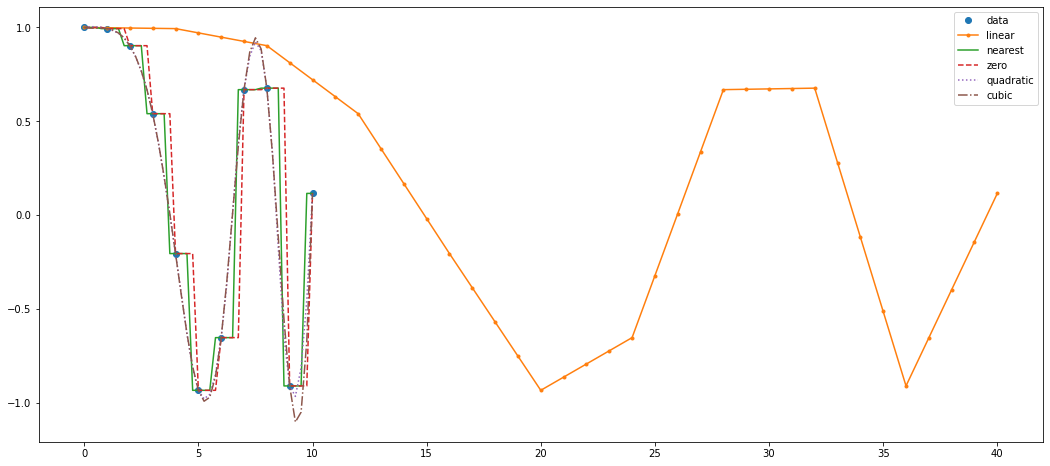

In [20]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9)

f = interp1d(x,y) # linear 
f2 = interp1d(x,y, kind='nearest')
f3 = interp1d(x,y, kind='zero')
f4 = interp1d(x,y, kind='quadratic')
f5 = interp1d(x,y, kind='cubic')

xnew = np.linspace(0,10, num=41, endpoint=True)

plt.figure(figsize=(18,8))
plt.plot(x,y,'o', f(xnew),'.-', xnew, f2(xnew), '-', xnew, f3(xnew), '--', xnew, f4(xnew), ':', xnew, f5(xnew), '-.')
plt.legend(['data', 'linear', 'nearest', 'zero', 'quadratic', 'cubic'], loc='best')
plt.show()

In [21]:
train.filter(regex='_dst$', axis=1).columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [22]:
train_dst_i = train_dst.interpolate(method='linear', axis=1)
train_dst_i.columns

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')

In [23]:
train_dst_i = train_dst.interpolate(method='linear', axis=1) # linear 보간을 완료
train_dst_i.columns = train.filter(regex='_dst$', axis=1).columns # 숫자 컬럼에서 dst문자 컬럼 변경
train_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [24]:
test_dst = test.filter(regex='_dst$', axis=1)
test_dst_i = test_dst.interpolate(method='linear', axis=1) # linear 보간을 완료
test_dst_i.columns = test.filter(regex='_dst$', axis=1).columns # 숫자 컬럼에서 dst문자 컬럼 변경
test_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

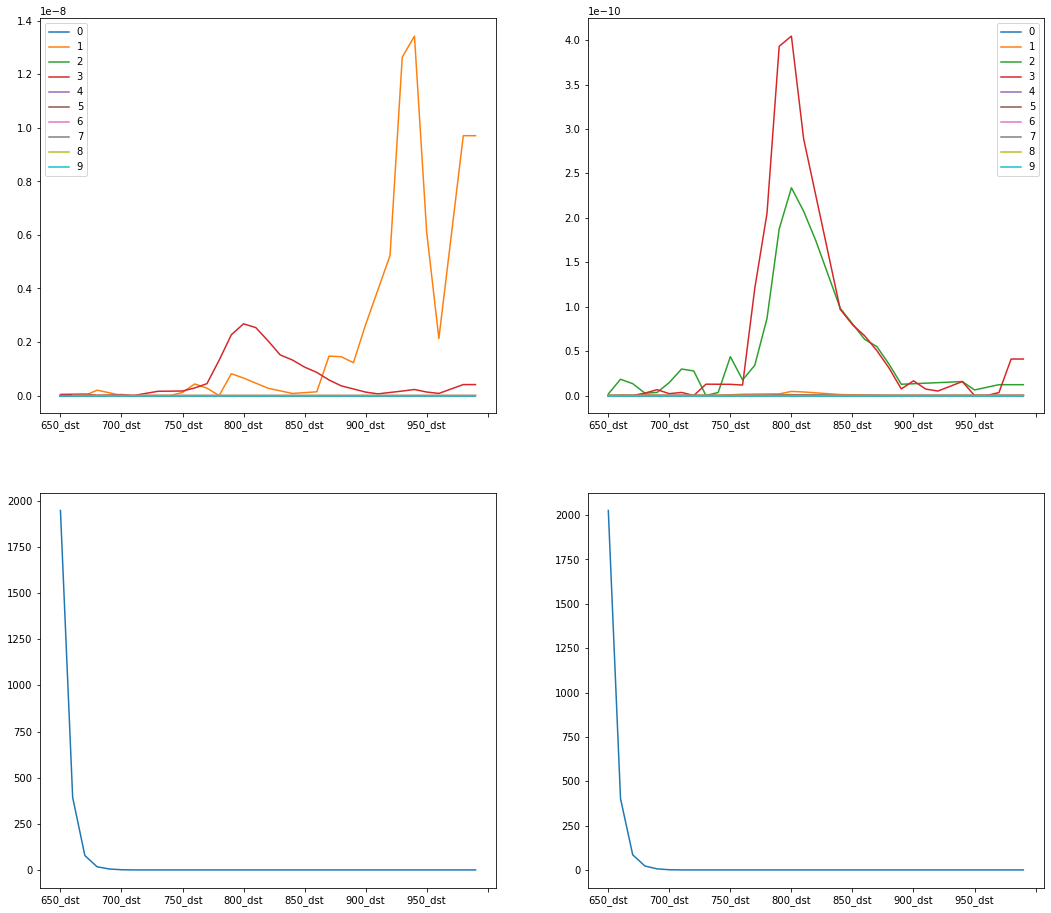

In [25]:
figure, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,16)

i = 10 
train_dst_i.head(i).T.plot(ax=ax1)
test_dst_i.head(i).T.plot(ax=ax2)
train_dst_i.isna().sum().plot(ax=ax3)
test_dst_i.isna().sum().plot(ax=ax4)

In [26]:
for i in range(34): 
    train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isna(), 
                    f'{980-(i*10)}_dst'] = train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isna(), 
                                                           f'{990-(i*10)}_dst']
    
    test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isna(), 
                   f'{980-(i*10)}_dst'] = test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isna(), 
                                                         f'{990-(i*10)}_dst']

<AxesSubplot:>

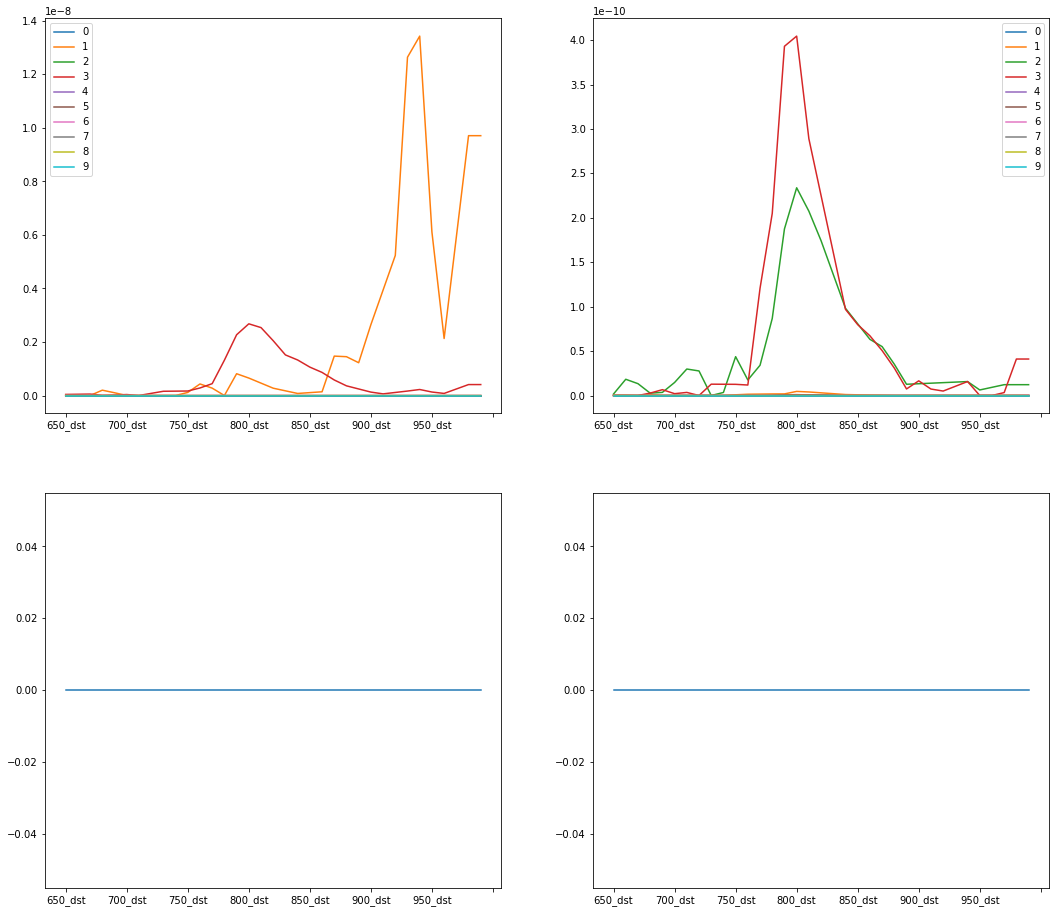

In [27]:
figure, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,16)

i = 10 
train_dst_i.head(i).T.plot(ax=ax1)
test_dst_i.head(i).T.plot(ax=ax2)
train_dst_i.isna().sum().plot(ax=ax3)
test_dst_i.isna().sum().plot(ax=ax4)

In [28]:
train.update(train_dst_i)
train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,3.227782e-19,0.000000e+00,5.337522e-19,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,5.920319e-09,9.710091e-09,9.710091e-09,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,1.329725e-18,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,2.433592e-10,4.088921e-10,4.088921e-10,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,1.103571e-13,1.330237e-13,1.330237e-13,1.330237e-13,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,3.280294e-16,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,7.926532e-11,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,1.431808e-12,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


<AxesSubplot:>

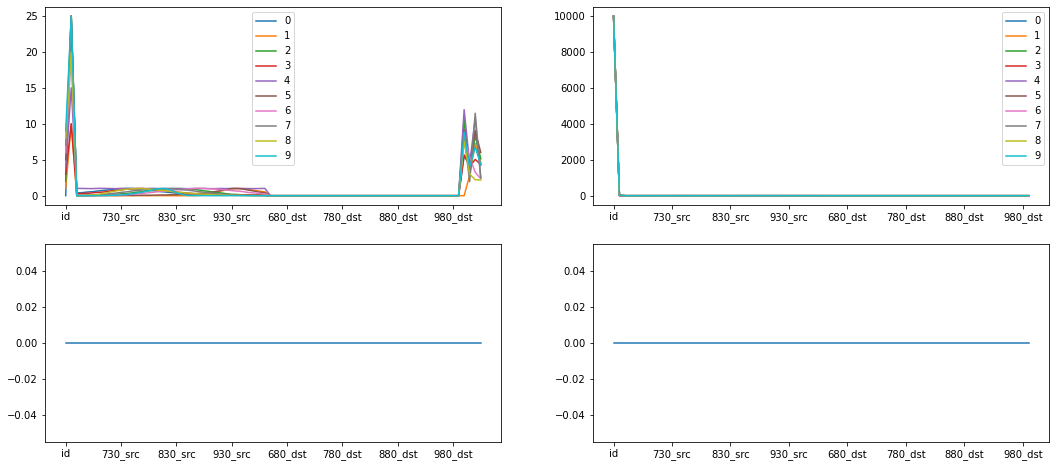

In [29]:
test.update(test_dst_i)

figure, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

i = 10 
train.head(i).T.plot(ax=ax1)
test.head(i).T.plot(ax=ax2)
train.isna().sum().plot(ax=ax3)
test.isna().sum().plot(ax=ax4)

In [30]:
# lambert - beer 법칙 new columns # 문제 2번 
for i in range(35) : 
    train[f'{ 650 + (i*10) }_ratio'] = np.log(train[f'{650 + i*10}_src']/train[f'{650 + i*10}_dst']) / (0.1*train['rho'])
    test[f'{ 650 + (i*10) }_ratio'] = np.log(test[f'{650 + i*10}_src']/test[f'{650 + i*10}_dst']) / (0.1*test['rho'])

<AxesSubplot:>

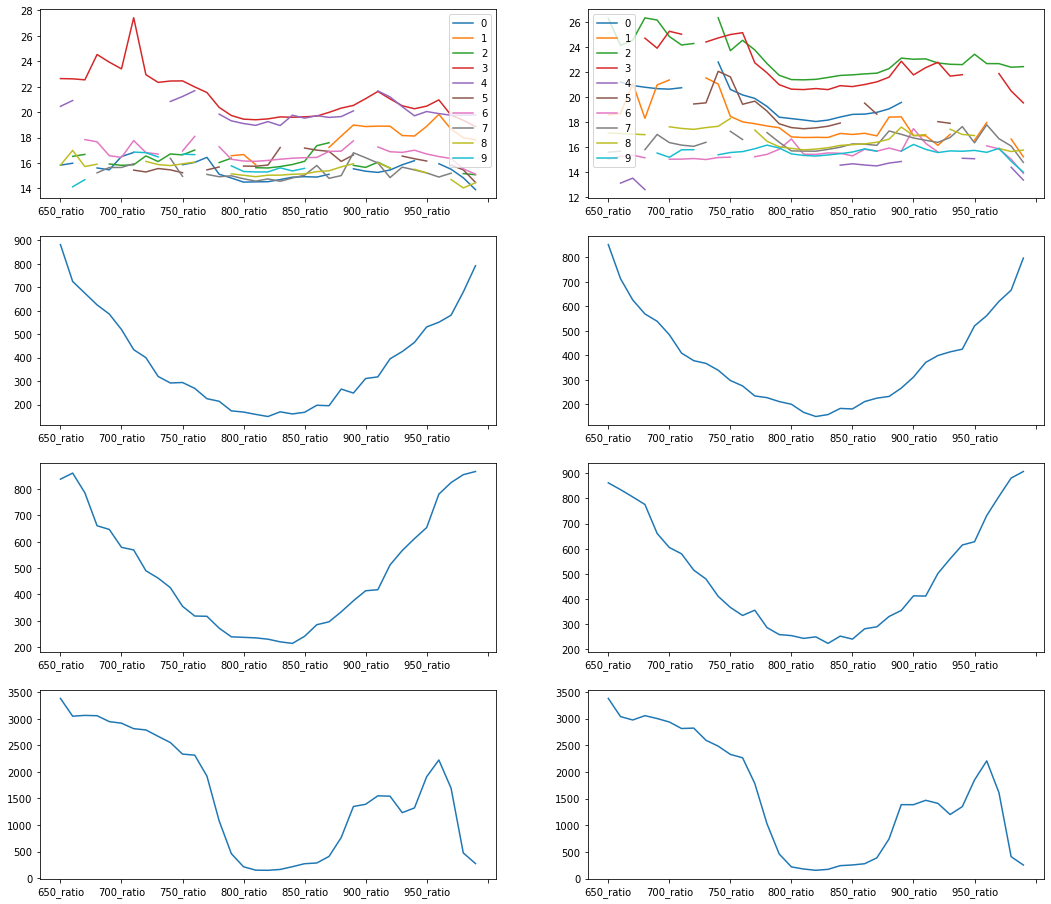

In [31]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10 

train.filter(regex='_ratio$', axis=1).head(i).T.plot(ax=ax1)

test.filter(regex='_ratio$', axis=1).head(i).T.plot(ax=ax2)

train.filter(regex='_ratio$', axis=1).isna().sum().plot(ax=ax3)

test.filter(regex='_ratio$', axis=1).isna().sum().plot(ax=ax4)

train.filter(regex='_ratio$', axis=1).isin([float('-inf')]).sum().plot(ax=ax5)

test.filter(regex='_ratio$', axis=1).isin([float('-inf')]).sum().plot(ax=ax6)

train.filter(regex='_ratio$', axis=1).isin([float('inf')]).sum().plot(ax=ax7)

test.filter(regex='_ratio$', axis=1).isin([float('inf')]).sum().plot(ax=ax8)

In [32]:
train_r = train.filter(regex='_ratio$', axis=1).replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
test_r = test.filter(regex='_ratio$', axis=1).replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

<AxesSubplot:>

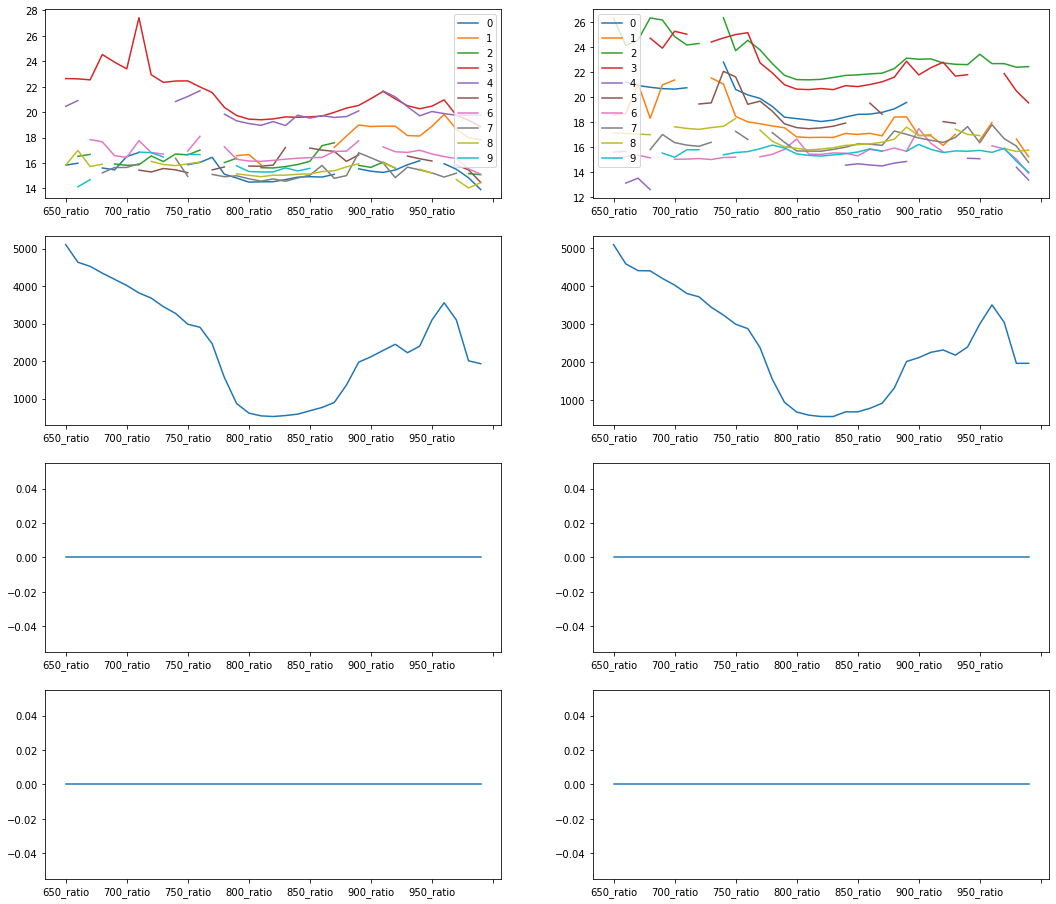

In [33]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10 

train_r.head(i).T.plot(ax=ax1)

test_r.head(i).T.plot(ax=ax2)

train_r.isna().sum().plot(ax=ax3)

test_r.isna().sum().plot(ax=ax4)

train_r.isin([float('-inf')]).sum().plot(ax=ax5)

test_r.isin([float('-inf')]).sum().plot(ax=ax6)

train_r.isin([float('inf')]).sum().plot(ax=ax7)

test_r.isin([float('inf')]).sum().plot(ax=ax8)

In [34]:
train_r.columns

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')

In [35]:
train_r.columns = list(650 + 10*np.arange(35))
test_r.columns = list(650 + 10*np.arange(35))
print(train_r.columns)
print(test_r.columns)

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')
Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')


In [36]:
# linear 보간
train_ratio = train_r.interpolate(method='linear', axis=1)
test_ratio = test_r.interpolate(method='linear', axis=1)

# 컬럼 원래 _ratio로 변환
train_ratio.columns = train.filter(regex='_ratio$', axis=1).columns
test_ratio.columns = test.filter(regex='_ratio$', axis=1).columns

print(train_ratio.columns)
print(test_ratio.columns)

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')
Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_rat

<AxesSubplot:>

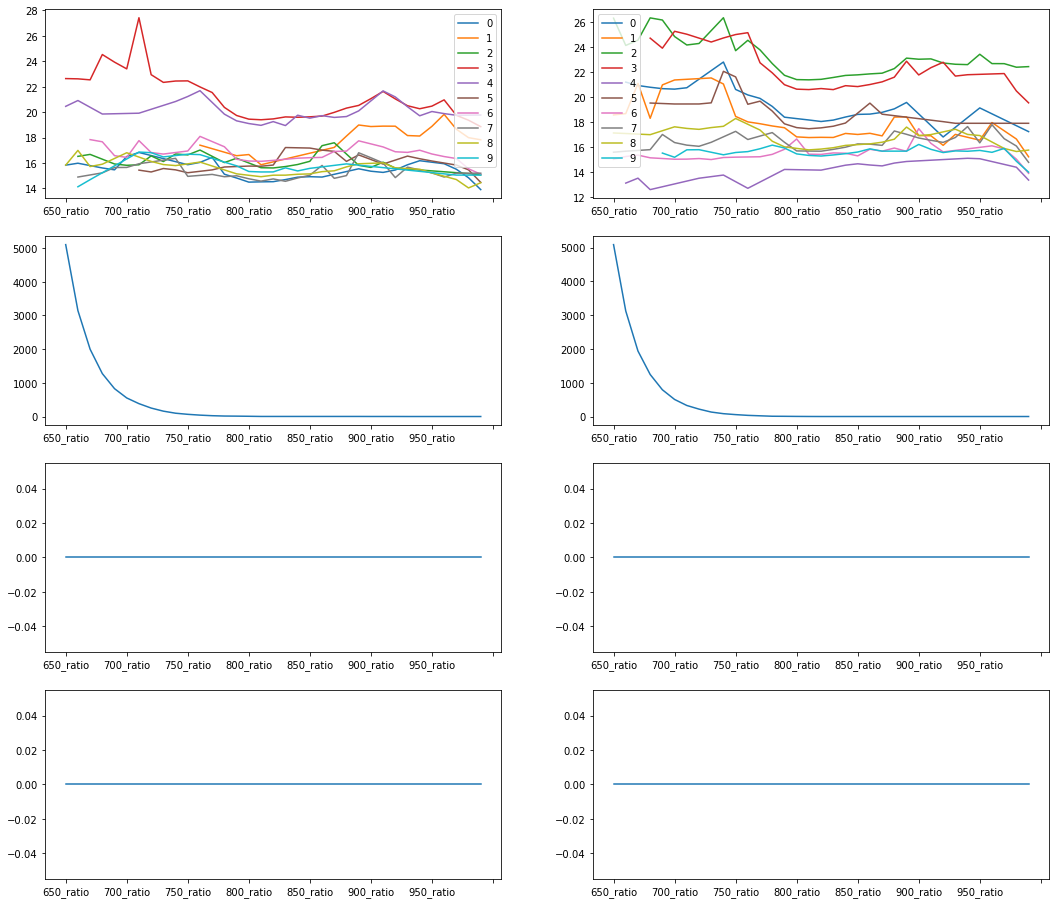

In [37]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10 

train_ratio.head(i).T.plot(ax=ax1)

test_ratio.head(i).T.plot(ax=ax2)

train_ratio.isna().sum().plot(ax=ax3)

test_ratio.isna().sum().plot(ax=ax4)

train_ratio.isin([float('-inf')]).sum().plot(ax=ax5)

test_ratio.isin([float('-inf')]).sum().plot(ax=ax6)

train_ratio.isin([float('inf')]).sum().plot(ax=ax7)

test_ratio.isin([float('inf')]).sum().plot(ax=ax8)

In [38]:
for i in range(34): 
    train_ratio.loc[train_ratio[f'{980-(i*10)}_ratio'].isna(), 
                    f'{980-(i*10)}_ratio'] = train_ratio.loc[train_ratio[f'{980-(i*10)}_ratio'].isna(), 
                                                           f'{990-(i*10)}_ratio']
    
    test_ratio.loc[test_ratio[f'{980-(i*10)}_ratio'].isna(), 
                   f'{980-(i*10)}_ratio'] = test_ratio.loc[test_ratio[f'{980-(i*10)}_ratio'].isna(), 
                                                         f'{990-(i*10)}_ratio']

<AxesSubplot:>

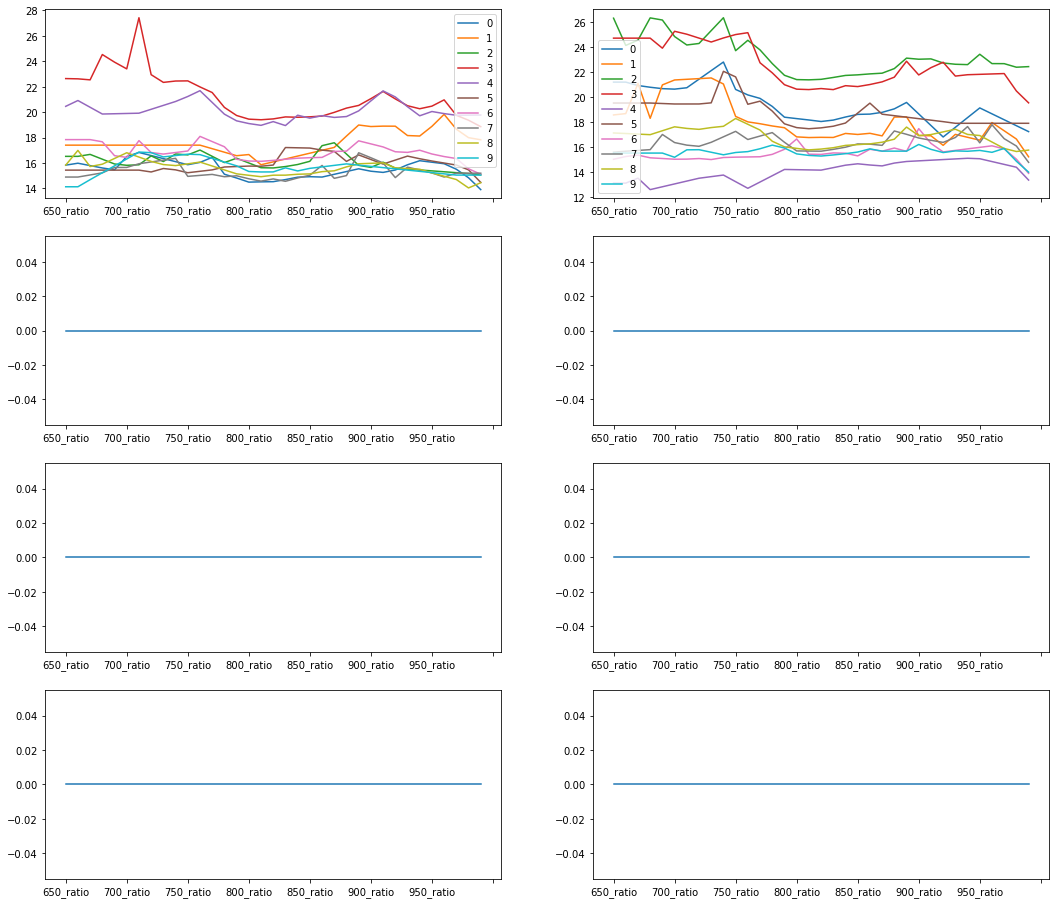

In [39]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10 

train_ratio.head(i).T.plot(ax=ax1)

test_ratio.head(i).T.plot(ax=ax2)

train_ratio.isna().sum().plot(ax=ax3)

test_ratio.isna().sum().plot(ax=ax4)

train_ratio.isin([float('-inf')]).sum().plot(ax=ax5)

test_ratio.isin([float('-inf')]).sum().plot(ax=ax6)

train_ratio.isin([float('inf')]).sum().plot(ax=ax7)

test_ratio.isin([float('inf')]).sum().plot(ax=ax8)

In [40]:
train.update(train_ratio)
test.update(test_ratio)

<AxesSubplot:>

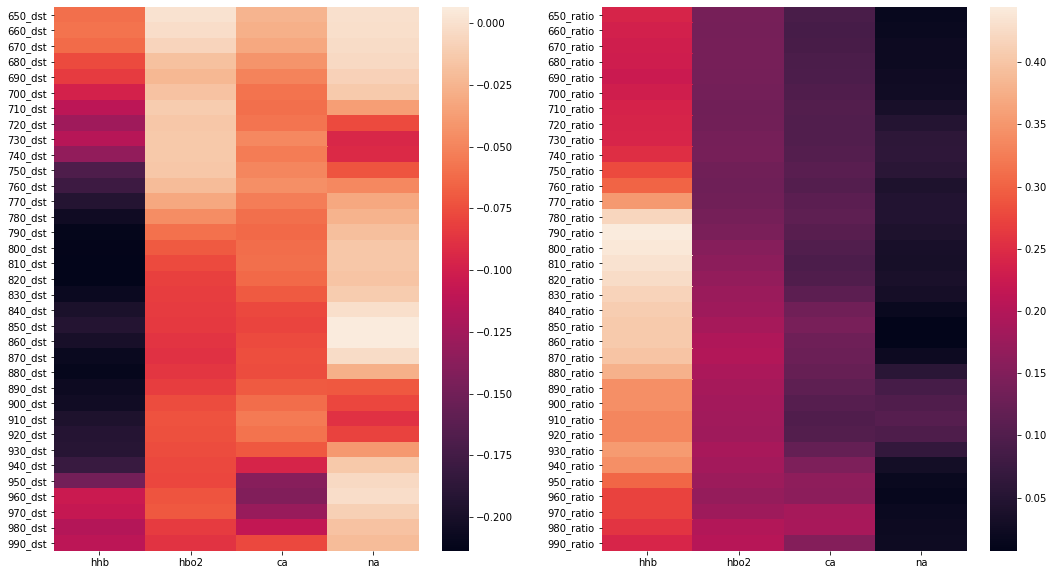

In [41]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,10)

sns.heatmap(train.corr().loc["650_dst":"990_dst", "hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio":"990_ratio", "hhb":"na"], ax=ax2)

In [42]:
for i in range(35) :
    train[f'{650 + (10*i)}_ratio_diff'] = train[f'{650 + (10*i)}_ratio'] - train['990_ratio']
    test[f'{650 + (10*i)}_ratio_diff'] = test[f'{650 + (10*i)}_ratio'] - test['990_ratio']

    
for i in range(35) :
    train[f'{650 + (10*i)}_ratio_diff2'] = train[f'{650 + (10*i)}_ratio'] - (train['850_ratio'] + train['860_ratio'])/2
    test[f'{650 + (10*i)}_ratio_diff2'] = test[f'{650 + (10*i)}_ratio'] - (test['850_ratio'] + test['860_ratio'])/2

<AxesSubplot:>

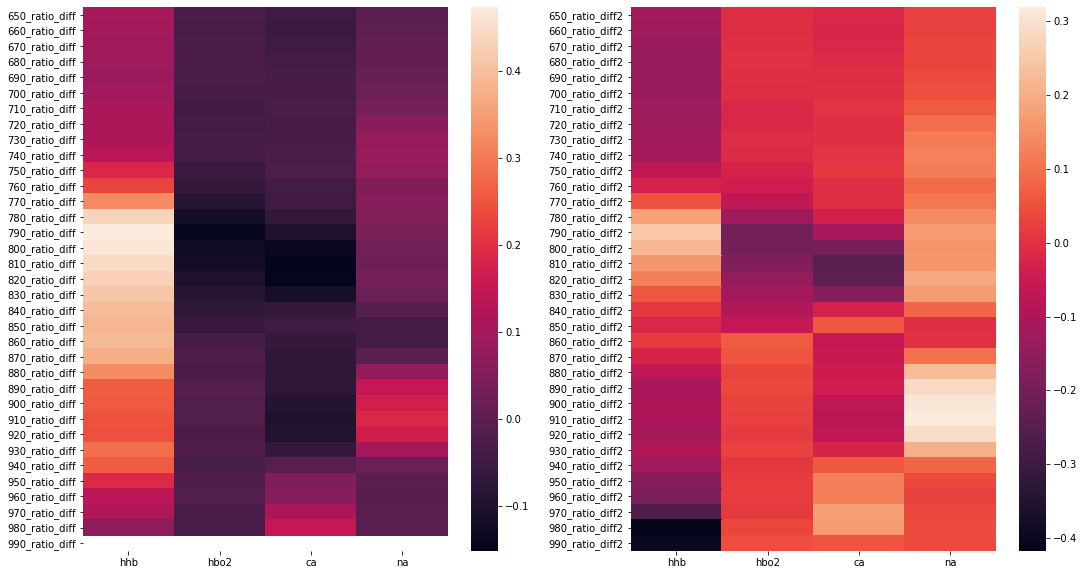

In [43]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,10)

sns.heatmap(train.corr().loc["650_ratio_diff":"990_ratio_diff", "hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_diff2":"990_ratio_diff2", "hhb":"na"], ax=ax2)

<AxesSubplot:>

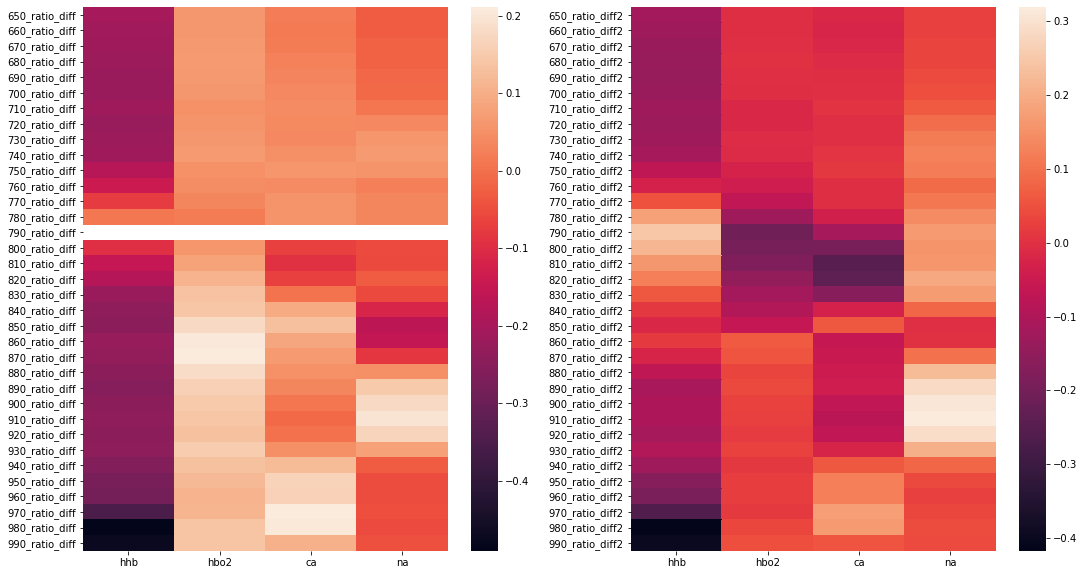

In [44]:
# 추가 과제
# 1) 790~830 범위를 빼보세요 : 800_ratio_diff 상수 값으로 고정 후 빼보기
# 2) 램버트 비어 법칙 추가 칼럼을 만들어보세요

for i in range(35) :
    train[f'{650 + (10*i)}_ratio_diff'] = train[f'{650 + (10*i)}_ratio'] - train['790_ratio']
    test[f'{650 + (10*i)}_ratio_diff'] = test[f'{650 + (10*i)}_ratio'] - test['790_ratio']
    
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,10)

sns.heatmap(train.corr().loc["650_ratio_diff":"990_ratio_diff", "hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_diff2":"990_ratio_diff2", "hhb":"na"], ax=ax2)

In [45]:
train_dst.index

RangeIndex(start=0, stop=10000, step=1)

In [46]:
# 평균 대비 dst 칼럼 값의 비율을 새로운 컬럼으로 만듭니다 # 문제 1번 
train_dst = train.filter(regex='_dst$', axis=1)
test_dst = test.filter(regex='_dst$', axis=1)

# for문 보다 tqdm문이 10배 정도 더 빠르다 
for i in tqdm(train_dst.index): 
    train_dst.loc[i] = train_dst.loc[i] / train_dst.loc[i].replace(0, np.nan).mean()

for i in tqdm(test_dst.index): 
    test_dst.loc[i] = test_dst.loc[i] / test_dst.loc[i].replace(0, np.nan).mean()

for i in range(35) : 
    train[f'{650 + 10*i}_dst_r'] = train_dst[f'{650 + 10*i}_dst']
    test[f'{650 + 10*i}_dst_r'] = test_dst[f'{650 + 10*i}_dst']

100%|██████████| 10000/10000 [00:05<00:00, 1864.03it/s]


<AxesSubplot:>

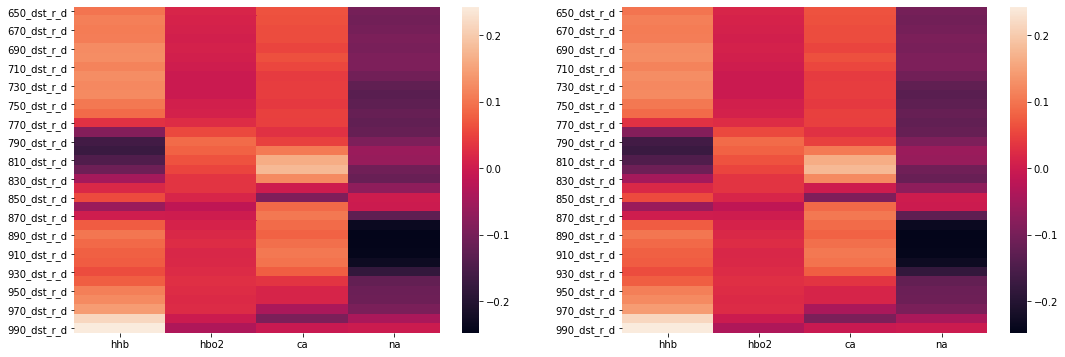

In [47]:
for i in range(35) :
    train[f'{650 + (10*i)}_dst_r_d'] = train[f'{650 + (10*i)}_dst_r'] - (train['850_dst_r'] + train['860_dst_r'])/2
    test[f'{650 + (10*i)}_dst_r_d'] = test[f'{650 + (10*i)}_dst_r'] - (test['850_dst_r'] + test['860_dst_r'])/2

    
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)

sns.heatmap(train.corr().loc["650_dst_r_d":"990_dst_r_d", "hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_dst_r_d":"990_dst_r_d", "hhb":"na"], ax=ax2)    


In [48]:
Xtrain = train.drop(['id', 'hhb', 'hbo2', 'ca', 'na'], axis=1)
Xtest = test.drop(['id'], axis=1)
Ytrain = train[['hhb','hbo2','ca','na']]

In [49]:
base_model = LGBMRegressor(random_state=18)
multi_model = MultiOutputRegressor(base_model)

In [50]:
multi_model

MultiOutputRegressor(estimator=LGBMRegressor(random_state=18))

In [51]:
# 머신러닝 학습 (개선 전)
y_pred = np.zeros((len(Xtest),4))
x_pred = np.zeros((len(Xtrain),4))
result = 0 
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)) : 
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    
    multi_model.fit(trn_x, trn_y)
    y_pred += multi_model.predict(Xtest) / n_splits

    x_pred += multi_model.predict(Xtrain) / n_splits
    
    val_pred = multi_model.predict(val_x)
    
    result += np.mean((np.abs(val_y - val_pred))) / n_splits
    
    print(result)

hhb     0.125551
hbo2    0.096948
ca      0.312836
na      0.213185
dtype: float64
hhb     0.258810
hbo2    0.196038
ca      0.611306
na      0.425146
dtype: float64
hhb     0.388743
hbo2    0.295185
ca      0.919962
na      0.638566
dtype: float64
hhb     0.522210
hbo2    0.396309
ca      1.225439
na      0.863196
dtype: float64
hhb     0.653836
hbo2    0.496277
ca      1.531207
na      1.076144
dtype: float64


In [52]:
result.mean()

0.9393660381344731

In [53]:
y_pred

array([[ 8.62216872,  4.98714867,  9.92329455,  2.55692798],
       [ 8.79888786,  2.5668813 ,  8.37651003,  3.15868382],
       [ 9.07727733,  5.097267  , 11.224929  ,  3.61553524],
       ...,
       [ 8.0048935 ,  4.35299365, 10.22481256,  3.87123938],
       [12.72829783,  4.57609623,  8.70386956,  3.90025976],
       [ 3.04546007,  5.29715542, 11.62613188,  2.54813662]])

In [54]:
sub = pd.read_csv('sample_submission.csv', index_col='id')

In [55]:
sub['hhb'] = y_pred[:,0]
sub['hbo2'] = y_pred[:,1]
sub['ca'] = y_pred[:,2]
sub['na'] = y_pred[:,3]
sub.head()

,hhb,hbo2,ca,na
id,,,,
10000,8.622169,4.987149,9.923295,2.556928
10001,8.798888,2.566881,8.376510,3.158684
10002,9.077277,5.097267,11.224929,3.615535
10003,8.507244,4.209378,9.337128,4.423400
10004,6.018128,3.202129,8.416208,2.895923


In [56]:
sub.to_csv("20210824Jonghyun.csv")

In [57]:
# 1. ratio/mean() 빼기 : 
# 2. ratio2 : 


# 3. ratio에서 추가로 빼기 

In [58]:
# 문제 1번 : train_ratio / mean()
# 문제 2번 : 램버트-비어 공식 A만들기 (수업 때 만든 건 A/d)
# 문제 3번 : 790_ratio ~ 830_ratio 상수값 제거 후 ratio_diff 컬럼 만들기 

# train_dst = train.filter(regex='_dst$', axis=1)
# test_dst = test.filter(regex='_dst$', axis=1)

# # for문 보다 tqdm문이 10배 정도 더 빠르다 
# for i in tqdm(train_dst.index): 
#     train_dst.loc[i] = train_dst.loc[i] / train_dst.loc[i].replace(0, np.nan).mean()

# for i in tqdm(test_dst.index): 
#     test_dst.loc[i] = test_dst.loc[i] / test_dst.loc[i].replace(0, np.nan).mean()

In [59]:
# lambert - beer 법칙 new columns # 문제 2번 
# for i in range(35) : 
#     train[f'{ 650 + (i*10) }_ratio'] = np.log(train[f'{650 + i*10}_src']/train[f'{650 + i*10}_dst']) / (0.1*train['rho'])
#     test[f'{ 650 + (i*10) }_ratio'] = np.log(test[f'{650 + i*10}_src']/test[f'{650 + i*10}_dst']) / (0.1*test['rho'])

In [60]:
# 문제 3번
# for i in range(35) :
#     train[f'{650 + (10*i)}_ratio_diff'] = train[f'{650 + (10*i)}_ratio'] - train['790_ratio']
#     test[f'{650 + (10*i)}_ratio_diff'] = test[f'{650 + (10*i)}_ratio'] - test['790_ratio']

In [61]:
# 문제 1번 : train_ratio / mean()
# for문 보다 tqdm문이 10배 정도 더 빠르다 

train_dst = train.filter(regex='_ratio$', axis=1)
test_dst = test.filter(regex='_ratio$', axis=1)

for i in tqdm(train_dst.index): 
    train_dst.loc[i] = train_dst.loc[i] / train_dst.loc[i].replace(0, np.nan).mean()

for i in tqdm(test_dst.index): 
    test_dst.loc[i] = test_dst.loc[i] / test_dst.loc[i].replace(0, np.nan).mean()
    
for i in range(35) : 
    train[f'{650 + 10*i}_ratio_m'] = train_dst[f'{650 + 10*i}_ratio']
    test[f'{650 + 10*i}_ratio_m'] = test_dst[f'{650 + 10*i}_ratio']

100%|██████████| 10000/10000 [00:05<00:00, 1928.62it/s]


<AxesSubplot:>

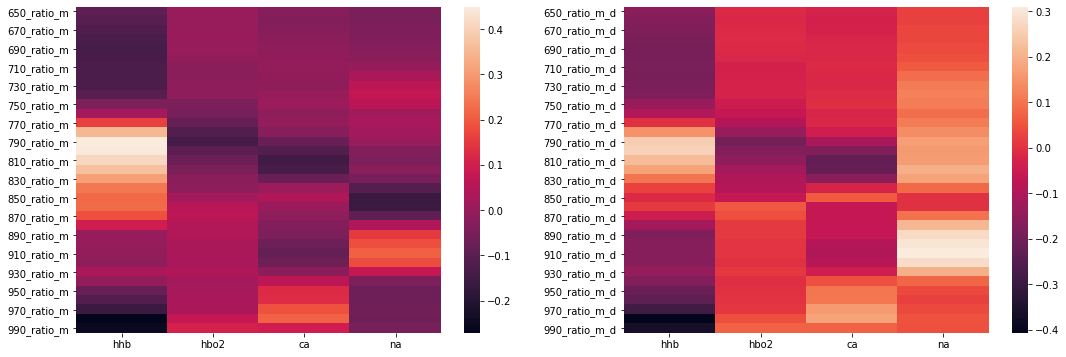

In [62]:
for i in range(35) :
    train[f'{650 + (10*i)}_ratio_m_d'] = train[f'{650 + (10*i)}_ratio_m'] - (train['850_ratio_m'] + train['860_ratio_m'])/2
    test[f'{650 + (10*i)}_ratio_m_d'] = test[f'{650 + (10*i)}_ratio_m'] - (test['850_ratio_m'] + test['860_ratio_m'])/2

    
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)

sns.heatmap(train.corr().loc["650_ratio_m":"990_ratio_m", "hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_m_d":"990_ratio_m_d", "hhb":"na"], ax=ax2)   

In [63]:
# 문제 2번 : 램버트-비어 공식 A만들기 (수업 때 만든 건 A/d)

# linear 보간2
train_ratio = train_r.interpolate(method='linear', axis=1)
test_ratio = test_r.interpolate(method='linear', axis=1)

# 컬럼 원래 _ratio로 변환2
train_ratio.columns = train.filter(regex='_ratio$', axis=1).columns
test_ratio.columns = test.filter(regex='_ratio$', axis=1).columns

print(train_ratio.columns)
print(test_ratio.columns)

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')
Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_rat

<AxesSubplot:>

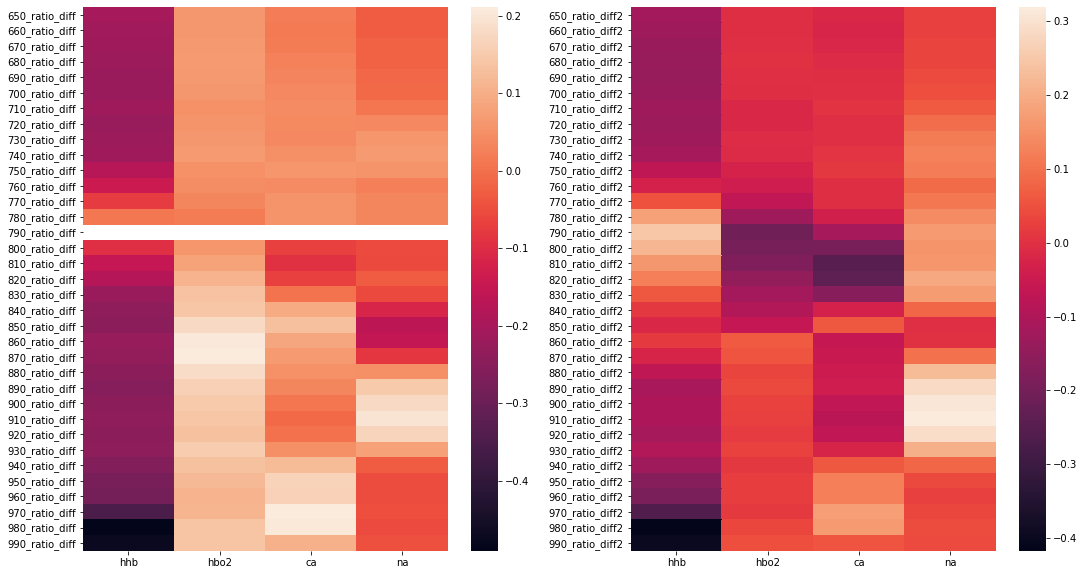

In [64]:
# 문제 3번 : 790_ratio ~ 830_ratio 상수값 제거 후 ratio_diff 컬럼 만들기 
for i in range(35) :
    train[f'{650 + (10*i)}_ratio_diff'] = train[f'{650 + (10*i)}_ratio'] - train['790_ratio']
    test[f'{650 + (10*i)}_ratio_diff'] = test[f'{650 + (10*i)}_ratio'] - test['790_ratio']
    
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,10)

sns.heatmap(train.corr().loc["650_ratio_diff":"990_ratio_diff", "hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_diff2":"990_ratio_diff2", "hhb":"na"], ax=ax2)

In [65]:
# 머신러닝 학습 (추가된 칼럼 전처리 후)
Xtrain = train.drop(['id','hhb','hbo2','ca','na'], axis=1)
Xtest = test.drop(['id'], axis=1)
Ytrain = train[['hhb','hbo2','ca','na']]

# 머신러닝 모델 
base_model = LGBMRegressor(random_state=18)
multi_model = MultiOutputRegressor(base_model)

y_pred = np.zeros((len(Xtest),4))
x_pred = np.zeros((len(Xtrain),4))
result = 0
n_splits = 5

# KFold는 k개의 폴드를 만들어 교차 검증한다 : k개의 모델(머신러닝 수식)이 나온다
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) # random_state : 숫자 아무거나 넣어도 됨

for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)):
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    
    multi_model.fit(trn_x, trn_y)
    
    y_pred += multi_model.predict(Xtest) / n_splits
    
    x_pred += multi_model.predict(Xtrain) / n_splits
    
    val_pred = multi_model.predict(val_x)
    
    result += np.mean((np.abs(val_y-val_pred))) / n_splits
    
    print(result)
    print("====================")
    print("테스트 데이터 예측값: ",y_pred)
    print(n_fold, trn_idx, val_idx)
    

hhb     0.124307
hbo2    0.096998
ca      0.311732
na      0.213518
dtype: float64
테스트 데이터 예측값:  [[1.76140363 1.02604573 1.76080342 0.40243417]
 [1.74587047 0.49649019 1.66696474 0.55940083]
 [1.87264251 1.01328274 2.20655826 0.65937867]
 ...
 [1.50271157 0.85304903 1.84609607 0.63032496]
 [2.56451978 0.97023225 1.81308935 0.88339128]
 [0.66351672 1.05594107 2.23396538 0.54916003]]
0 [   1    2    4 ... 9996 9997 9999] [   0    3    8 ... 9989 9993 9998]
hhb     0.255244
hbo2    0.194201
ca      0.614330
na      0.425119
dtype: float64
테스트 데이터 예측값:  [[3.40094741 2.09283712 3.6274106  0.96048308]
 [3.54527442 1.01328618 3.34995555 1.11522935]
 [3.83357328 2.01187895 4.45446085 1.41723199]
 ...
 [2.93131299 1.75318321 3.79231034 1.42569511]
 [5.1304929  1.88246907 3.52729267 1.7491418 ]
 [1.36767486 2.13985037 4.5331683  1.06244243]]
1 [   0    1    2 ... 9997 9998 9999] [  26   27   30 ... 9960 9962 9996]
hhb     0.383560
hbo2    0.293021
ca      0.920907
na      0.639254
dtype: float64

In [66]:
Xtrain['probe_hhb'] = x_pred[:,0] # 첫 번째 열을 probe_hhb 칼럼으로 지정
Xtrain['probe_hbo2'] = x_pred[:,1]
Xtrain['probe_ca'] = x_pred[:,2]
Xtrain['probe_na'] = x_pred[:,3]

Xtrain[['probe_hhb', 'probe_hbo2', 'probe_ca', 'probe_na']].head()

,probe_hhb,probe_hbo2,probe_ca,probe_na
0,5.826707,4.294961,8.775813,3.734711
1,1.171135,2.789714,7.450749,3.677179
2,10.501786,3.604262,8.980128,3.296470
3,5.447362,4.122973,4.986675,4.318169
4,11.467036,4.726045,9.472031,3.004138


In [67]:
Xtest['probe_hhb'] = y_pred[:,0] # 첫 번째 열을 probe_hhb 칼럼으로 지정
Xtest['probe_hbo2'] = y_pred[:,1]
Xtest['probe_ca'] = y_pred[:,2]
Xtest['probe_na'] = y_pred[:,3]

Xtest[['probe_hhb', 'probe_hbo2', 'probe_ca', 'probe_na']].head()

,probe_hhb,probe_hbo2,probe_ca,probe_na
0,8.450690,5.076426,9.294171,2.641360
1,8.893828,2.470822,8.532251,2.968176
2,9.551229,5.096675,11.238456,3.594122
3,8.340406,4.160168,9.062211,4.424396
4,6.018452,3.122294,8.759765,2.906393


In [68]:
sub2 = pd.read_csv('/Users/user/Downloads/실전데이터알아보기 by 케이데이터랩 유요한/sample_submission.csv', index_col='id')

In [69]:
# result의 빈 창고
order = [[0,0,0,0]]
columns = [Ytrain.columns[0], Ytrain.columns[1], Ytrain.columns[2], Ytrain.columns[3]]
output = pd.DataFrame(order, columns = columns)
output

,hhb,hbo2,ca,na
0,0,0,0,0


In [70]:
# 칼럼을 삭제하는 머신러닝 학습 : LGBMRegressor 모델 학습
for col in range(4): 
    Ytrain_temp = Ytrain[Ytrain.columns[col]].copy()
    
    y_pred = np.zeros(len(Xtest))
    x_label = np.zeros(len(Xtrain))
    
    result = 0 
    n_splits = 5
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    Xtrain_f = Xtrain.drop(['probe_'+Ytrain.columns[col]], axis=1)
    Xtest_f = Xtest.drop(['probe_'+Ytrain.columns[col]], axis=1)
    
    for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain_f)): 
        trn_x, trn_y = Xtrain_f.iloc[trn_idx], Ytrain_temp.iloc[trn_idx]
        val_x, val_y = Xtrain_f.iloc[val_idx], Ytrain_temp.iloc[val_idx]
        
        model = lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=10000, num_leaves=80, max_depth=-1, 
                                 subsample=0.9, colsample_bytree=0.8, learning_rate=0.0188, 
                                 reg_alpha=1, reg_lambda=1)
        
        model.fit(trn_x, trn_y, eval_set=[(trn_x, trn_y), (val_x, val_y)], 
                  early_stopping_rounds=100, verbose=-1, eval_metric='mae')
        
        y_pred += model.predict(Xtest_f) / n_splits
        x_label += model.predict(Xtrain_f) / n_splits
        
        val_pred = model.predict(val_x)
        result += np.mean((np.abs(val_y-val_pred))) / n_splits
        print(result)
        
    sub2[Ytrain.columns[col]] = y_pred
    output[Ytrain.columns[col]] = result
sub2
        
    

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3002]	training's l1: 0.0178253	training's l2: 0.000566013	valid_1's l1: 0.525216	valid_1's l2: 0.582937
0.10504314148931612
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3110]	training's l1: 0.0172872	training's l2: 0.000523998	valid_1's l1: 0.543757	valid_1's l2: 0.675403
0.21379449307586226
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3209]	training's l1: 0.0168915	training's l2: 0.0005126	valid_1's l1: 0.543215	valid_1's l2: 0.700694
0.3224374112850664
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3223]	training's l1: 0.0169503	training's l2: 0.000517461	valid_1's l1: 0.553646	valid_1's l2: 0.673068
0.4331665915076475
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3103]	training's l

,hhb,hbo2,ca,na
id,,,,
10000,8.629736,5.107394,9.029478,2.546536
10001,8.824454,2.448546,8.432466,2.997988
10002,9.446389,4.992440,10.778172,3.692456
10003,8.272887,4.127020,9.106278,4.464160
10004,6.594737,3.208468,8.676938,2.860267
...,...,...,...,...
19995,4.009636,4.441628,11.899301,5.309757
19996,10.657072,3.092908,6.420917,3.100939
19997,7.430657,4.391778,9.929627,3.364684


In [73]:
# 아웃풋 확인
output

,hhb,hbo2,ca,na
0,0.543919,0.431465,1.441967,1.042636


In [74]:
output.iloc[0]

hhb     0.543919
hbo2    0.431465
ca      1.441967
na      1.042636
Name: 0, dtype: float64

In [75]:
output.iloc[0].mean() # 낮을 수록 좋음

0.8649966285916778

In [76]:
sub2.to_csv('newfile2.csv')

In [77]:
x_pred

array([[ 5.8267074 ,  4.29496062,  8.77581252,  3.7347107 ],
       [ 1.17113536,  2.78971424,  7.45074892,  3.67717907],
       [10.50178571,  3.6042616 ,  8.98012753,  3.29646984],
       ...,
       [10.0755767 ,  3.42785218,  9.60782872,  1.20448011],
       [ 5.89836668,  4.19569316, 12.09376976,  4.565149  ],
       [ 9.87931528,  3.71827751,  9.92912773,  4.0535293 ]])

In [78]:
y_pred

array([2.54653558, 2.99798772, 3.69245598, ..., 3.36468428, 4.04610779,
       2.66734791])